# Aviation Data Analysis
## Phase 1 Project - Moringa School
### Author: Ashley Nyaboke Kibwogo
Goal:Analyze aviation accident data to recommend safer aircraft options based on historical patterns.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Business Understanding

Aircraft accidents pose a significant risk to both passengers and operators.
By analyzing past accidents, we aim to identify patterns that can inform safer aircraft choices.
Our objective is to provide data-driven recommendations to stakeholders for improved decision-making.

## Data Understanding

## 1. Load and Inspect the Data
Let’s load the aviation accident dataset and preview the first few rows to understand its structure.

In [2]:
df = pd.read_csv("Aviation_Data.csv")

C:\Users\ASHLEY\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## 2. Data Exploration
Checking the data types, getting summary statistics, and looking at missing values.


In [4]:
# General info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [5]:
# Summary statistics for numerical columns
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [6]:
# Check missing values
df.isnull().sum().sort_values(ascending=False)

Schedule                  77766
Air.carrier               73700
FAR.Description           58325
Aircraft.Category         58061
Longitude                 55975
Latitude                  55966
Airport.Code              40099
Airport.Name              37558
Broad.phase.of.flight     28624
Publication.Date          16689
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Fatal.Injuries      12860
Engine.Type                8536
Report.Status              7840
Purpose.of.flight          7651
Number.of.Engines          7543
Total.Uninjured            7371
Weather.Condition          5951
Aircraft.damage            4653
Registration.Number        2776
Injury.Severity            2459
Country                    1685
Amateur.Built              1561
Model                      1551
Make                       1522
Location                   1511
Event.Date                 1459
Accident.Number            1459
Event.Id                   1459
Investigation.Type            0
dtype: i

## 3. Data Preparation
Some columns have too many missing values to be useful. We'll drop them to simplify our dataset.


In [7]:
columns_to_drop = [
    'Schedule',
    'Air.carrier',
    'FAR.Description',
    'Aircraft.Category',
    'Longitude',
    'Latitude',
    'Airport.Code',
    'Airport.Name'
]
df.drop(columns=columns_to_drop, inplace=True)


In [8]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

### Filling Missing Values: Weather Condition
We'll fill missing weather data with "Unknown" since it's a categorical column and we don't want to lose the row.


In [9]:
# Fill missing weather conditions with 'Unknown'
df['Weather.Condition'] = df['Weather.Condition'].fillna('Unknown')
df['Weather.Condition']

0            UNK
1            UNK
2            IMC
3            IMC
4            VMC
          ...   
90343    Unknown
90344    Unknown
90345        VMC
90346    Unknown
90347    Unknown
Name: Weather.Condition, Length: 90348, dtype: object

### Filling Missing Values: Injury Columns
We assume missing injury values mean 0 injuries, so we'll fill those with 0.


In [10]:
injury_cols = [
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured'
]

for col in injury_cols:
    df[col] = df[col].fillna(0)


In [11]:
print(injury_cols)

['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']


In [12]:
df["Total.Fatal.Injuries"]

0        2.0
1        4.0
2        3.0
3        2.0
4        1.0
        ... 
90343    0.0
90344    0.0
90345    0.0
90346    0.0
90347    0.0
Name: Total.Fatal.Injuries, Length: 90348, dtype: float64

In [13]:
df['Purpose.of.flight'] = df['Purpose.of.flight'].fillna('Unknown')


### Dropping Rows with Missing Critical Info
For key columns like 'Make', 'Model', and 'Injury.Severity', missing values make the data unreliable. We'll drop those rows.


In [14]:
df.dropna(subset=['Make', 'Model', 'Injury.Severity'], inplace=True)


### Removing Duplicates
To ensure data accuracy, we’ll remove any completely duplicated rows.


In [15]:
df = df.drop_duplicates()


## Final Check After Cleaning
All critical missing values have been handled. The dataset is now clean and ready for exploratory data analysis (EDA).


In [16]:
df.isnull().sum().sort_values(ascending=False)


Broad.phase.of.flight     26115
Publication.Date          14946
Engine.Type                6221
Report.Status              5442
Number.of.Engines          5322
Aircraft.damage            2677
Registration.Number        1268
Country                     225
Amateur.Built                99
Location                     52
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Model                         0
Make                          0
Total.Minor.Injuries          0
Total.Uninjured               0
Injury.Severity               0
Weather.Condition             0
Event.Date                    0
Accident.Number               0
Investigation.Type            0
Event.Id                      0
dtype: int64

## Data Analysis (EDA) and Visualizations

Now we explore key patterns in the aviation accident dataset using visualizations. The goal is to uncover factors that may contribute to more severe accidents, particularly in terms of injury severity, and identify risk patterns associated with aircraft types and flight conditions.

The insights gained from these visuals will support risk-based recommendations to help stakeholders make safer aircraft decisions.

We will focus on the following:

- Weather conditions vs. injury severity
- Flight phase vs. injury severity
- Aircraft type or damage vs. injury severity

Bonus visualizations such as geographic hotspots and aircraft make vs fatalities are included at the end for additional context.


In [17]:
df['Injury.Severity'].value_counts(dropna=False)


Non-Fatal     67305
Fatal(1)       6159
Fatal          5248
Fatal(2)       3703
Incident       2214
              ...  
Fatal(230)        1
Fatal(49)         1
Fatal(256)        1
Fatal(143)        1
Fatal(28)         1
Name: Injury.Severity, Length: 109, dtype: int64

### Cleaning Injury Severity Labels

The `Injury.Severity` column contains inconsistent labels like "Fatal", "Fatal(2)", "Non-Fatal", and many variations with numbers or special characters.

To simplify the analysis, we created a new column called `Injury.Category` with just three categories:
- **Fatal**: Includes all records that contain the word "fatal" (e.g., "Fatal(1)", "Fatal(78)", etc.)
- **Non-Fatal**: Direct matches to the "Non-Fatal" label
- **Other**: Anything that doesn't clearly fit either group (e.g., "Incident", "Unavailable", NaNs)

This helps us make cleaner and more meaningful visualizations.



In [18]:
def simplify_injury_severity(value):
    if isinstance(value, str):
        val = value.lower()
        if 'fatal' in val:
            return 'Fatal'
        elif 'non-fatal' in val:
            return 'Non-Fatal'
        else:
            return 'Other'
    else:
        return 'Other'

# Apply the function to create a cleaned column
df['Injury.Category'] = df['Injury.Severity'].apply(simplify_injury_severity)

# Confirm new categories
print(df['Injury.Category'].value_counts())


Fatal    85098
Other     2700
Name: Injury.Category, dtype: int64


In [19]:
df["Injury.Severity"]

0         Fatal(2)
1         Fatal(4)
2         Fatal(3)
3         Fatal(2)
4         Fatal(1)
           ...    
90341        Minor
90342        Fatal
90343        Minor
90345    Non-Fatal
90347        Minor
Name: Injury.Severity, Length: 87798, dtype: object


# 1: Weather vs Injury Severity

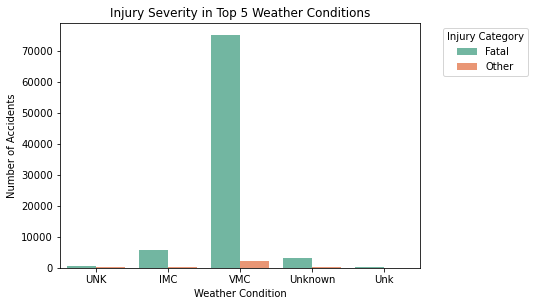

In [20]:

# Use top 5 weather conditions only
top_weather = df['Weather.Condition'].value_counts().head(5).index
filtered_df = df[df['Weather.Condition'].isin(top_weather)]

# Set up plot
plt.figure(figsize=(8,5))
sns.countplot(data=filtered_df, x='Weather.Condition', hue='Injury.Category', palette='Set2')

plt.title('Injury Severity in Top 5 Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.legend(title='Injury Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(right=0.75, bottom=0.2)
plt.show()


In [21]:
df['Broad.phase.of.flight'].value_counts()


Landing        15423
Takeoff        12481
Cruise         10263
Maneuvering     8138
Approach        6538
Climb           2031
Taxi            1958
Descent         1886
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad.phase.of.flight, dtype: int64

# 2: Flight Phase vs Injury Severity

In [22]:
# Drop rows with missing phase values
phase_df = df.dropna(subset=['Broad.phase.of.flight'])

In [23]:
# Sort phases by frequency for clearer visual order
phase_order = phase_df['Broad.phase.of.flight'].value_counts().index


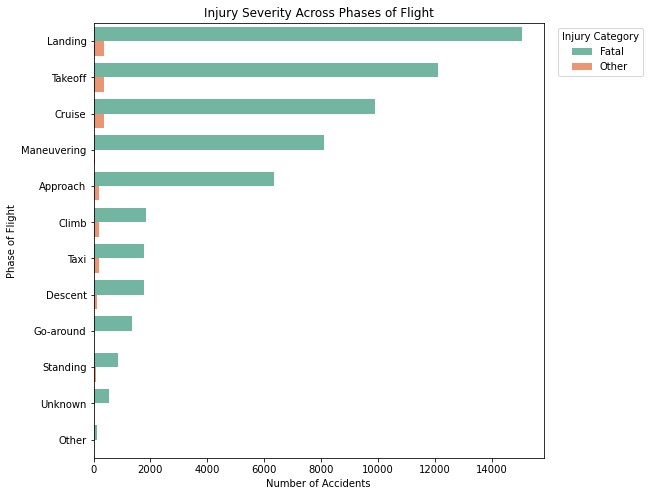

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(data=phase_df, y='Broad.phase.of.flight', hue='Injury.Category',
              palette='Set2', order=phase_order)

plt.title('Injury Severity Across Phases of Flight')
plt.xlabel('Number of Accidents')
plt.ylabel('Phase of Flight')
plt.legend(title='Injury Category', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.subplots_adjust(right=0.75)
plt.show()


In [25]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date',
       'Injury.Category'],
      dtype='object')

#  3: Injury Severity by Aircraft Make

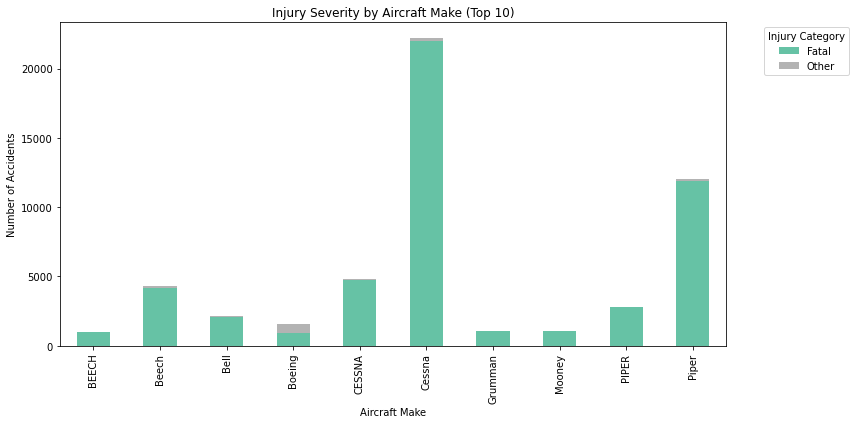

In [26]:
# Crosstab of Top 10 Makes vs Injury Severity
make_df = df.dropna(subset=['Make'])
top_10_makes = make_df['Make'].value_counts().head(10).index
top_make_df = make_df[make_df['Make'].isin(top_10_makes)]

make_crosstab = pd.crosstab(top_make_df['Make'], top_make_df['Injury.Category'])

make_crosstab.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title('Injury Severity by Aircraft Make (Top 10)')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.legend(title='Injury Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 4: Top Locations with Highest Number of Accidents

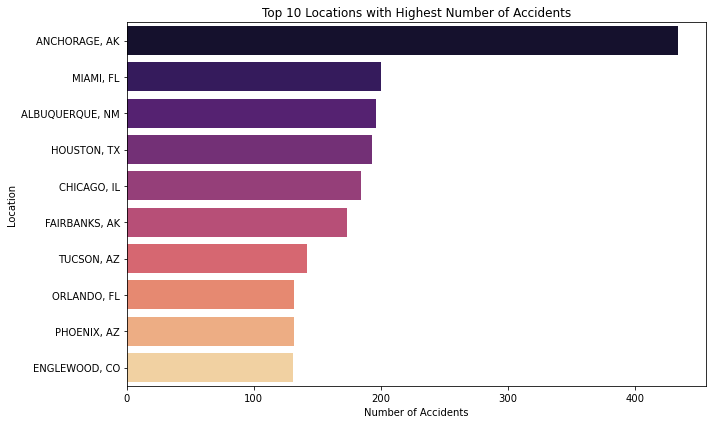

In [27]:
# Drop rows with missing locations
location_df = df.dropna(subset=['Location'])

# Get top 10 most frequent locations
top_locations = location_df['Location'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='magma')
plt.title('Top 10 Locations with Highest Number of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


# 5: Heatmap - Phase of Flight vs Injury Category


In [28]:
# Drop missing values in the two key columns
heat_df = df.dropna(subset=['Broad.phase.of.flight', 'Injury.Category'])

# Create crosstab
phase_heat = pd.crosstab(heat_df['Broad.phase.of.flight'], heat_df['Injury.Category'])


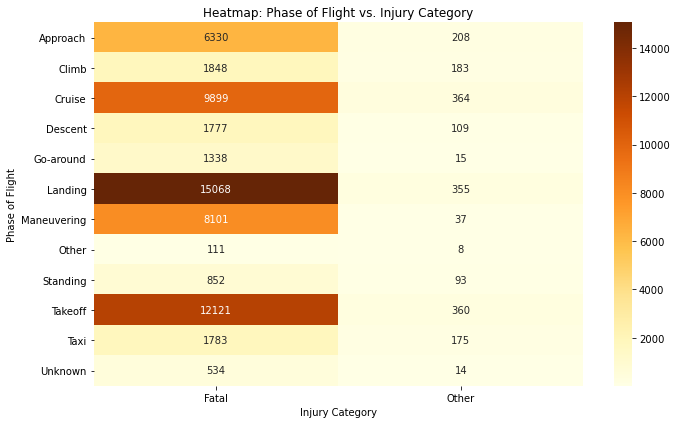

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(phase_heat, annot=True, fmt='d', cmap='YlOrBr')
plt.title('Heatmap: Phase of Flight vs. Injury Category')
plt.xlabel('Injury Category')
plt.ylabel('Phase of Flight')
plt.tight_layout()
plt.show()


# 6: Aircraft Damage Distribution

In [30]:
# Drop missing values in 'Aircraft.damage'
damage_df = df.dropna(subset=['Aircraft.damage'])

# Count categories
damage_counts = damage_df['Aircraft.damage'].value_counts()


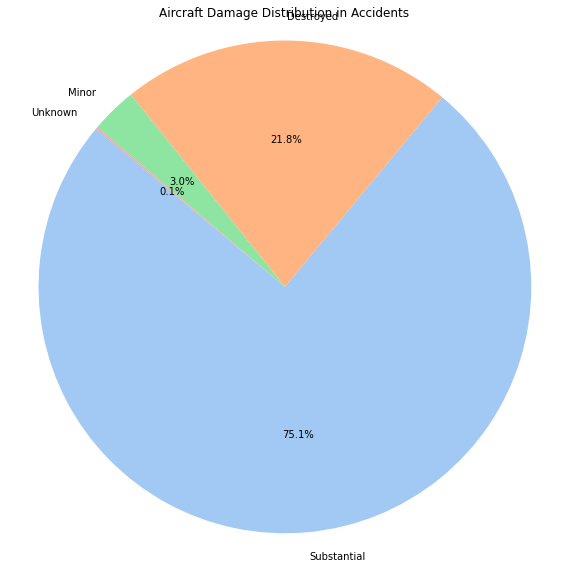

In [31]:
plt.figure(figsize=(8,8))
colors = sns.color_palette('pastel')[0:len(damage_counts)]

plt.pie(damage_counts, labels=damage_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Aircraft Damage Distribution in Accidents')
plt.axis('equal')  # Equal aspect ratio makes it a circle
plt.tight_layout()
plt.show()


In [32]:
# Save cleaned dataset to a CSV file
df.to_csv('cleaned_aviation_data.csv', index=False)


In [33]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date',
       'Injury.Category'],
      dtype='object')

##  Summary of Findings & Recommendations
 - IMC conditions and ambiguous weather correlate with higher fatality rates.
 - Takeoff, landing, and maneuvering phases are risk-prone.
 - Smaller aircraft types (like Cessna and Piper) experience the highest number of accidents.
 - Robinson helicopters show higher fatality proportions.
 - Accident data is geographically dense in the U.S., suggesting a focus area for safety improvements.

 This analysis can help guide safer aircraft selection and highlight areas for policy and training improvements.
